In [ ]:
df = data.frame(
     t =c(1,2,3,4,5,6,7),
     y=c(1.0,0.5,2.0,2.0,3.5,3.0,4.0),
     x=c(4.0,4.0,3.5,4.0,2.0,2.5,1.5)
)
df

t,y,x
<dbl>,<dbl>,<dbl>
1,1.0,4.0
2,0.5,4.0
3,2.0,3.5
4,2.0,4.0
5,3.5,2.0
6,3.0,2.5
7,4.0,1.5


In [8]:
library(ggplot2)

`geom_smooth()` using formula = 'y ~ x'


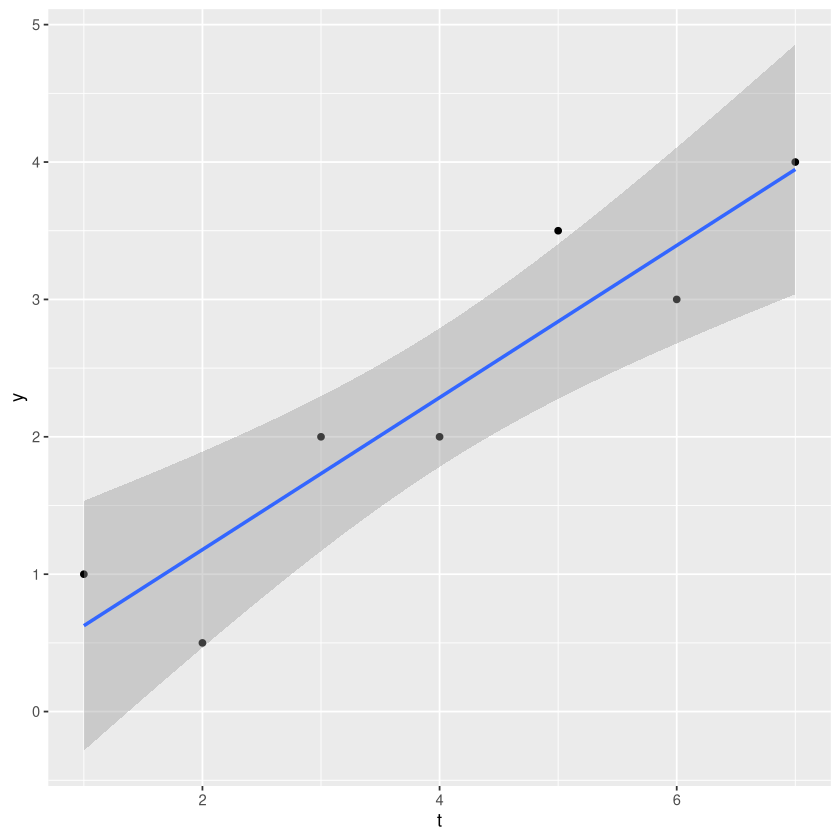

In [24]:
ggplot(df, aes(x=t,y=y))+geom_point()+  geom_smooth(method='lm')

`geom_smooth()` using formula = 'y ~ x'


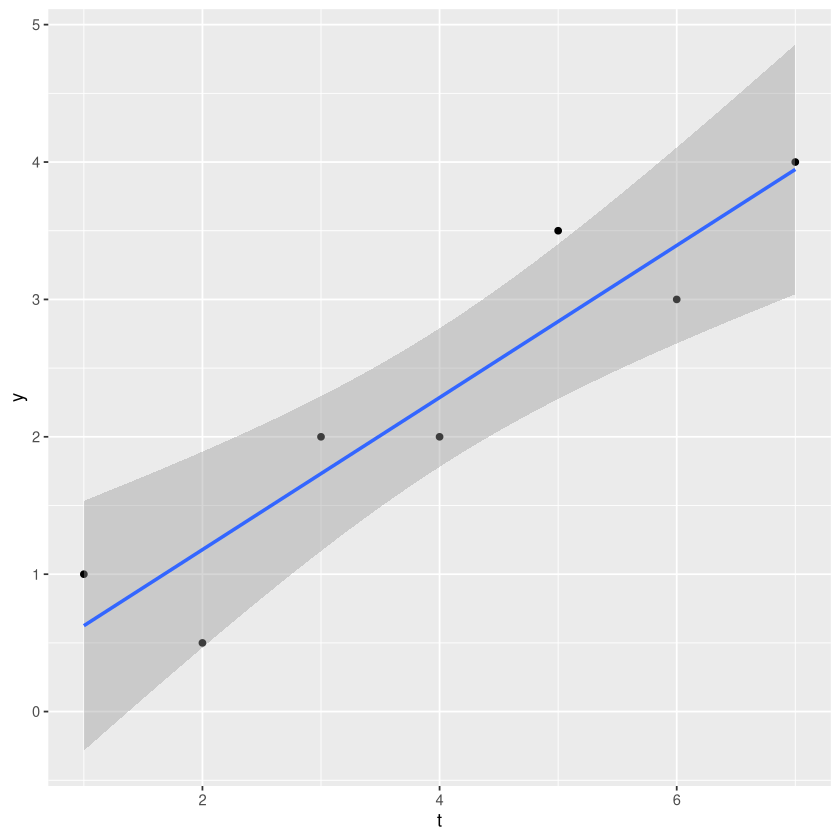

In [23]:
ggplot(df, aes(x=t,y=y)) + geom_point() +  geom_smooth(method='lm')

In [ ]:
model = lm(y~x,df)
summary(model)


Call:
lm(formula = y ~ x, data = df)

Residuals:
        1         2         3         4         5         6         7 
-0.228723 -0.728723  0.202128  0.771277 -0.005319  0.063830 -0.074468 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.7819     0.6168   9.375 0.000233 ***
x            -1.1383     0.1913  -5.950 0.001917 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4957 on 5 degrees of freedom
Multiple R-squared:  0.8762,	Adjusted R-squared:  0.8515 
F-statistic:  35.4 on 1 and 5 DF,  p-value: 0.001917


ERROR: Error in stderr(model): unused argument (model)


In [44]:
new_data = data.frame(x=c(0.5))
predict(model,new_data, interval = "prediction", level = 0.90)

,fit,lwr,upr
1,5.212766,3.755702,6.66983


In [73]:
ts_data <- ts(df[c("y")], start = 1, frequency = 1)
is.ts(ts_data)
ts_data

[1] TRUE

y
1.0
0.5
2.0
2.0
3.5
3.0
4.0


In [ ]:
model = ar.ols(ts_data,order.max = 1)   

ERROR: Error in ar.mle(ts_data, order.max = 1): MLE only implemented for univariate series


In [79]:
pred = predict(model,n.ahead = 1)

In [80]:
fit <- pred$pred
se  <- pred$se
lower <- fit - 1.645 * se
upper <- fit + 1.645 * se
data.frame(fit, lower, upper)

,fit,lower,upper
,<ts>,<ts>,<ts>
fit,3.326203,1.769218,4.883189
